In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names = ['labels', 'message'])
df

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
#### using stemming approach 

In [4]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.stem import PorterStemmer
import re
import nltk

In [5]:
stemmer = PorterStemmer()
corpus = []
for ind in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][ind])
    review = review.lower()
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if word not in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [8]:
import gensim
import os

In [11]:
os.getcwd()
word2vec_file = os.path.join(os.getcwd(), 'GoogleNews-vectors-negative300.bin')

In [12]:
google_wv = gensim.models.KeyedVectors.load_word2vec_format(word2vec_file, binary=True)

In [13]:
google_wv['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [14]:
# the set of the words used to train the google news
google_wv.index_to_key

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

#### lemmatization

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [19]:
corpus_lemma = []
for ind in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][ind])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords]
    review = ' '.join(review)
    corpus_lemma.append(review)

In [20]:
corpus_lemma

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [21]:
new_corpus = [nltk.word_tokenize(token) for token in corpus_lemma]

In [22]:
new_corpus

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'apply'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  

In [23]:
#### Train word2vec from scratch
model = gensim.models.Word2Vec(new_corpus, window=5, min_count=2)

In [24]:
# vocabulary of text to be used for email classification
model.wv.index_to_key

['u',
 'call',
 'get',
 'ur',
 'gt',
 'go',
 'lt',
 'ok',
 'day',
 'free',
 'know',
 'come',
 'got',
 'like',
 'good',
 'time',
 'text',
 'love',
 'want',
 'send',
 'p',
 'r',
 'one',
 'need',
 'txt',
 'today',
 'n',
 'going',
 'c',
 'stop',
 'home',
 'lor',
 'k',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'think',
 'tell',
 'week',
 'hi',
 'phone',
 'new',
 'please',
 'later',
 'pls',
 'co',
 'msg',
 'min',
 'make',
 'night',
 'dear',
 'message',
 'well',
 'say',
 'thing',
 'much',
 'claim',
 'oh',
 'hope',
 'great',
 'hey',
 'number',
 'give',
 'b',
 'na',
 'happy',
 'friend',
 'wat',
 'work',
 'way',
 'yes',
 'www',
 'e',
 'prize',
 'let',
 'wan',
 'right',
 'tomorrow',
 'already',
 'tone',
 'ask',
 'win',
 'said',
 'life',
 'amp',
 'cash',
 'im',
 'yeah',
 'really',
 'babe',
 'meet',
 'find',
 'miss',
 'morning',
 'year',
 'uk',
 'last',
 'thanks',
 'service',
 'care',
 'com',
 'anything',
 'would',
 'also',
 'nokia',
 'lol',
 'feel',
 'ever

In [25]:
# checks for similarity between the vector of the corpus and that of the google news
model.wv.most_similar('prize')

[('claim', 0.9994907379150391),
 ('cash', 0.9992327094078064),
 ('guaranteed', 0.999136745929718),
 ('call', 0.9991095066070557),
 ('land', 0.9990556836128235),
 ('line', 0.9990522861480713),
 ('draw', 0.9990144968032837),
 ('show', 0.9989100694656372),
 ('contact', 0.9988459348678589),
 ('urgent', 0.998779296875)]

In [26]:
# vector representation of the word 'prize'
model.wv['prize']

array([-2.04174146e-01,  5.86593151e-01,  1.62642360e-01,  3.75928991e-02,
        9.88311470e-02, -8.31582487e-01,  3.32570285e-01,  8.21105540e-01,
       -3.21699560e-01, -2.04502940e-01, -2.47239038e-01, -6.19390368e-01,
       -2.78367824e-03,  2.10802034e-01,  6.39350992e-03, -2.34482437e-01,
        8.50114599e-02, -5.41484594e-01, -5.84968971e-03, -1.01374614e+00,
        2.68512249e-01,  8.11673552e-02,  2.34084398e-01, -7.02741370e-02,
       -2.17938468e-01,  1.00554223e-03, -2.41385117e-01, -3.22200298e-01,
       -4.28598672e-01,  1.07750207e-01,  5.74355543e-01,  8.78867656e-02,
        9.47246328e-02, -2.55989701e-01, -1.84887812e-01,  3.93899828e-01,
        1.50833046e-02, -4.23653305e-01, -2.01607957e-01, -8.82957220e-01,
        9.22710672e-02, -4.39405710e-01, -5.78755587e-02, -1.86294690e-02,
        3.41542453e-01, -1.57238558e-01, -2.09553897e-01, -9.83111337e-02,
        2.24189982e-01,  2.75898814e-01,  2.01637000e-01, -2.70381153e-01,
       -1.31624386e-01, -

###### PLotting the vectors on a 2-D space

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# plotting 30 of the vectors
X = model.wv[model.wv.index_to_key][:30]

In [29]:
pca = PCA(n_components = 2)
result = pca.fit_transform(X)
words = model.wv.index_to_key[:30]

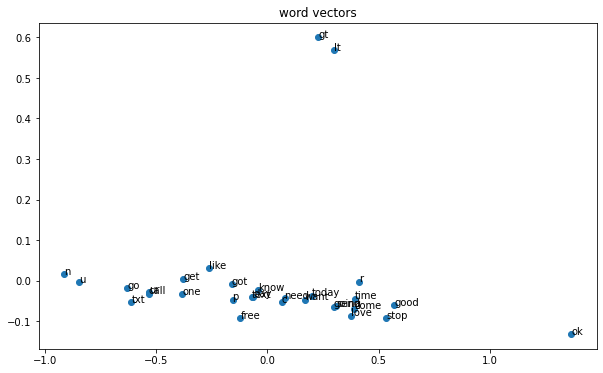

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])
for ind, word in enumerate(words):
    plt.annotate(word, xy=(result[ind, 0], result[ind, 1]))
plt.title('word vectors');

###### Average word2vec

In [65]:
def avgword2vec(doc):
    avgvector = []
    for i, word in enumerate(doc):
        avgvector.append(np.mean([model.wv[get_word] for get_word in word if get_word in model.wv.index_to_key]))
    return avgvector

In [66]:
# the positions with nan are those that did not start with number
word_vectors = avgword2vec(new_corpus)

In [67]:
# tuple of independent vectors and target
word_target = [(word_vectors[i], df['labels'][i]) for i in range(len(new_corpus))]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
vector_df = pd.DataFrame.from_records(word_target, columns=['vectors', 'target'])
vector_df

,vectors,target
0,-0.001201,ham
1,-0.000658,ham
2,-0.000576,spam
3,-0.001439,ham
4,-0.001190,ham
...,...,...
5567,-0.000930,spam
5568,-0.001113,ham
5569,-0.000506,ham
5570,-0.000693,ham


In [70]:
vector_df.dropna(inplace=True)

In [71]:
X = vector_df.drop('target', axis=1)
y = vector_df['target']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [75]:
pred = logreg.predict(X_test)

accuracy 86.5465
[[1441    0]
 [ 224    0]]
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1441
        spam       0.00      0.00      0.00       224

    accuracy                           0.87      1665
   macro avg       0.43      0.50      0.46      1665
weighted avg       0.75      0.87      0.80      1665



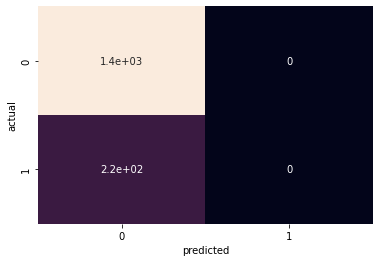

In [76]:
print('accuracy {}'.format(round(accuracy_score(y_test, pred)*100, 4)))
print(confusion_matrix(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cbar=False)
plt.xlabel('predicted')
plt.ylabel('actual')
print(classification_report(y_test, pred))

In [77]:
# prediction is wrong since all words do not have vectors in the training sample. OOV
new_test = ['we won 1 million']
model_pred = logreg.predict([avgword2vec(new_test)])
model_pred[0]

'ham'

###### Using google_word2vec to make prediction

In [78]:
# same result as above...the tranning data is highly imbalanced
def google_avgword2vec(doc):
    avgvector = []
    for i, word in enumerate(doc):
        avgvector.append(np.mean([google_wv[get_word] for get_word in word if get_word in google_wv.index_to_key]))
    return avgvector

In [79]:
new_test = ['we won 1 million']
model_pred = logreg.predict([google_avgword2vec(new_test)])
model_pred[0]

'ham'

In [80]:
vector_df['target'].value_counts()

ham     4803
spam     747
Name: target, dtype: int64

#### The data used for this problem is imbalanced